In [1]:
import pandas as pd
import re
import os
import sys
import pickle as pkl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import json

sys.path.append('../front_end')

df_annotations = pd.read_csv("../data/ctgov/annotations/all_annotations.csv")


In [2]:
MODELS_DIR = REPO_DIR + '/front_end/models/'

In [3]:
df_val = df_annotations[df_annotations.train_val == "val"]

In [4]:
accuracy_scores = {}
auc_scores = {}

In [ ]:
cwd = os.getcwd()

In [ ]:
os.chdir('../front_end')

In [5]:
from util.protocol_master_processor import MasterProcessor

master_processor = MasterProcessor("models/condition_classifier.pkl.bz2",
                                   "models/phase_rf_classifier.pkl.bz2",
                                   "models/spacy-textcat-phase-04-model-best",
                                   "models/sap_classifier_document_level.pkl.bz2",
                                   "models/sap_classifier.pkl.bz2",
                                   "models/effect_estimate_classifier.pkl.bz2",
                                   "models/num_subjects_classifier.pkl.bz2",
                                   "models/subjects_classifier_document_level.pkl.bz2",
                                   "models/arms_classifier_document_level.pkl.bz2",
                                   "models/spacy-textcat-arms-21-model-best",
                                   "models/spacy-textcat-international-11-model-best",
                                   "models/spacy-textcat-country-16-model-best",
                                   "models/international_classifier.pkl.bz2",
                                   "models/country_ensemble_model.pkl.bz2",
                                   "models/simulation_classifier.pkl.bz2")

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:32

# Get predictions

In [6]:
pred_phase = []
pred_sap =[]
pred_num_subjects = []
with open("log_output.txt", "w", encoding="utf-8") as fl:
    def log(l):
        fl.write(l)
        
    for i in range(len(df_val)):
        file_name = df_val.file.iloc[i]

        with open("json/" + file_name + ".json", "r", encoding="utf-8") as f:
            pages = json.load(f)

        results = master_processor.process_protocol(
            pages, log, disable=["condition", # "phase","sap", "num_subjects", 
                  "effect_estimate","country", "simulation"
            ])
        
        pred_phase.append(results[2]['prediction'])
        pred_sap.append(results[3]['prediction'])
        pred_num_subjects.append(results[5]['prediction'])

In [7]:
df_val["pred_phase"] = pred_phase
df_val["pred_sap"] = pred_sap
df_val["pred_num_subjects"] = pred_num_subjects

/tmp/ipykernel_114135/2802573700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["pred_phase"] = pred_phase
/tmp/ipykernel_114135/2802573700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["pred_sap"] = pred_sap
/tmp/ipykernel_114135/2802573700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [8]:
df_val

,file,nct_id,train_val,num_arms,num_subjects,phase,intervention_type,has_sap,pred_phase,pred_sap,pred_num_subjects
12,00_NCT01887600_Prot_000.pdf,NCT01887600,val,2.0,NaN,Phase 3,Drug,0,3.0,1,450
49,00_NCT02821000_Prot_SAP_000.pdf,NCT02821000,val,1.0,NaN,Phase 1,Biological,1,2.0,0,100
50,00_NCT02827500_Prot_000.pdf,NCT02827500,val,2.0,NaN,Phase 4,Drug,0,0.0,0,450
51,00_NCT02839200_Prot_000.pdf,NCT02839200,val,6.0,NaN,Phase 2,Drug,0,2.0,1,50
52,00_NCT02862600_Prot_000.pdf,NCT02862600,val,1.0,NaN,Phase 2,Drug,0,2.0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...
11903,99_NCT03813199_Prot_000.pdf,NCT03813199,val,3.0,NaN,Phase 2,Drug,0,1.0,0,60
11904,99_NCT03818399_Prot_SAP_000.pdf,NCT03818399,val,1.0,NaN,Phase 3,Drug,1,3.0,0,100
11905,99_NCT03826199_Prot_SAP_000.pdf,NCT03826199,val,NaN,NaN,Phase 4,Drug,1,2.0,0,220
11906,99_NCT03870399_Prot_SAP_ICF_000.pdf,NCT03870399,val,1.0,NaN,Phase 2,Drug,1,2.0,0,277


# Evaluate the phase extractor

In [9]:
df_val_phase_ground_truth_known = df_val[~df_val.phase.isna()]

In [10]:
# convert phase from float value to string value
pred_phase_preprocessed = df_val_phase_ground_truth_known.pred_phase.map(
    {0:'Not Applicable',
    1:'Phase 1',
    1.5:'Phase 1/Phase 2',
    2:'Phase 2',
    2.5:'Phase 2/Phase 3',
    3:'Phase 3',
    3.5:'Phase 3/Phase 4',
    4:'Phase 4'},
)

In [11]:
acc = accuracy_score(df_val_phase_ground_truth_known.phase.apply(str), pred_phase_preprocessed)
print (f"Phase accuracy {acc}")

Phase accuracy 0.49952696310312206


''

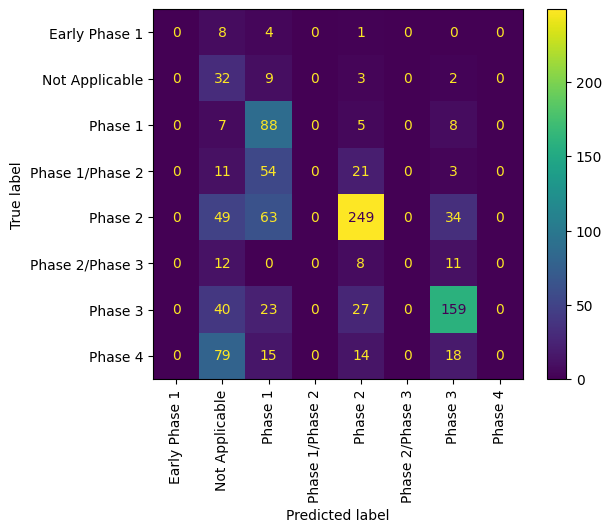

In [12]:
ConfusionMatrixDisplay.from_predictions(df_val_phase_ground_truth_known.phase.apply(str), pred_phase_preprocessed)
plt.xticks(rotation=90)
;

# Evaluate the number of subjects extractor

In [13]:
df_val_num_subjects_ground_truth_known = df_val[~df_val.num_subjects.isna()]

In [14]:
df_val_num_subjects_ground_truth_known

,file,nct_id,train_val,num_arms,num_subjects,phase,intervention_type,has_sap,pred_phase,pred_sap,pred_num_subjects
340,02_NCT03899402_Prot_000.pdf,NCT03899402,val,4.0,114.0,Phase 2/Phase 3,Drug,0,3.0,0,38
348,02_NCT04873102_Prot_SAP_000.pdf,NCT04873102,val,1.0,10.0,Phase 2,Drug,1,1.0,0,50
449,03_NCT03814603_Prot_SAP_000.pdf,NCT03814603,val,NaN,210.0,NaN,Drug,1,0.0,0,210
679,05_NCT03877705_Prot_000.pdf,NCT03877705,val,2.0,98.0,Early Phase 1,Drug,0,0.0,1,82
1552,12_NCT03832712_Prot_000.pdf,NCT03832712,val,2.0,100.0,Not Applicable,Drug,0,0.0,0,100
1615,13_NCT02852213_Prot_SAP_002.pdf,NCT02852213,val,1.0,31.0,Phase 1,Drug,1,1.0,0,300
2001,16_NCT03887416_Prot_SAP_000.pdf,NCT03887416,val,2.0,225.0,Phase 4,Drug,1,1.0,0,75
2612,21_NCT03809221_Prot_SAP_000.pdf,NCT03809221,val,2.0,1892.0,Phase 4,Drug,1,0.0,0,1892
2649,22_NCT01892722_Prot_001.pdf,NCT01892722,val,3.0,220.0,Phase 3,Drug,0,3.0,1,190
2904,24_NCT02867124_Prot_SAP_000.pdf,NCT02867124,val,2.0,240.0,Phase 3,Drug,1,3.0,0,240


In [15]:
num_subjects_ground_truths = df_val_num_subjects_ground_truth_known.num_subjects.apply(int)
num_subjects_predictions = df_val_num_subjects_ground_truth_known.pred_num_subjects.apply(int)

In [16]:
acc = accuracy_score(num_subjects_ground_truths, num_subjects_predictions)
print (f"Num subjects accuracy {acc}")

Num subjects accuracy 0.3225806451612903


''

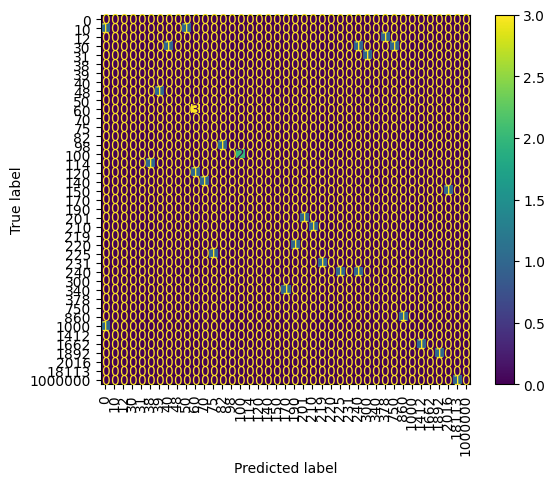

In [17]:
ConfusionMatrixDisplay.from_predictions(num_subjects_ground_truths, num_subjects_predictions)
plt.xticks(rotation=90)
;

In [18]:
mean_absolute_error(num_subjects_ground_truths, num_subjects_predictions)

31846.322580645163

In [19]:
np.sqrt(mean_squared_error(num_subjects_ground_truths, num_subjects_predictions))

176352.6034566416

# Evaluate the SAP extractor

In [20]:
sap_ground_truths = df_val.has_sap.apply(int)
sap_predictions =  df_val.pred_sap.apply(int)

''

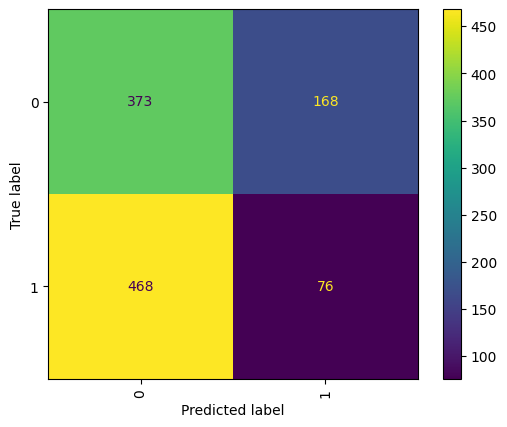

In [21]:
ConfusionMatrixDisplay.from_predictions(sap_ground_truths, sap_predictions)
plt.xticks(rotation=90)
;

In [22]:
acc = accuracy_score(sap_ground_truths, sap_predictions)
print (f"SAP accuracy {acc}")

SAP accuracy 0.41382488479262675
